In [17]:
#| export
import svgutils
from svgutils.compose import *
import dabest
import matplotlib.pyplot as plt
# plt.style.use('seaborn-colorblind')
import esploco.plotTools
from esploco.plotTools import setFont
setFont('inter', 6)
# plt.style.use('seaborn-colorblind')
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
from matplotlib import font_manager
import matplotlib
font_dirs = ["/Users/xusy/Library/Fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.compare import compare_survival

import pickle
import pandas as pd
import scipy
import numpy as np
import dabest
paperpath = '/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/'
imagepath = paperpath + 'Figures20240202/'
figurepath = imagepath + '/Figure6/'
picklepath = paperpath + 'DataforFigures/Behavior/Data/pickles/'
%run '/Users/sangyuxu/Documents/GitHub/Holophenotype5HT/nbs/02_helper/Gdocs API/writepdtogoogledocs.ipynb'
SPREADSHEET_ID = '1bfGN-K6iH7GY6251Gcr82kYUqRVCrMzLB9npzBWjuC4'


In [2]:
!pip install scikit-survival


In [3]:
starve = pd.read_csv('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Starvation Resistance/starve.csv',delimiter=',')
starve = starve.set_index('Day')
starvePerc = starve/starve.iloc[1,:]

In [4]:
starve

,R50H05>Chr,W;R50H05,Trh>Chr,W;Trh,W;Chr,Trh>VNC-Chr,W;VNC-Chr,Trh>ACR1
Day,,,,,,,,
0,50,25,87,25,40,49,24,15
1,50,25,87,25,40,49,24,15
2,22,20,73,25,38,48,24,12
3,0,2,5,13,6,37,14,3
4,0,0,0,0,0,14,1,0
5,0,0,0,0,0,0,0,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because

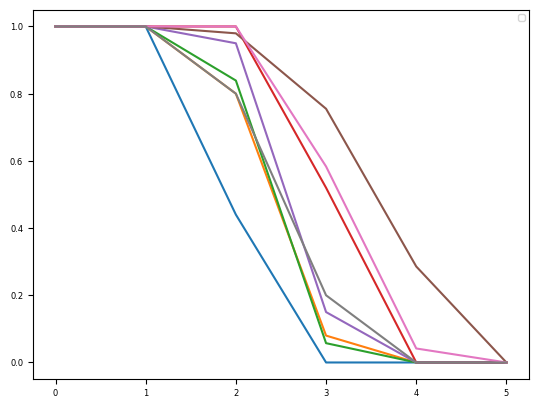

In [5]:
plt.plot(starvePerc)
plt.legend()

In [6]:
starve1 = pd.read_csv('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Starvation Resistance/starve.csv',delimiter=',')
df = pd.melt(starve1, id_vars=['Day'], value_vars= starve1.columns[1::], value_name='count', var_name = 'genotype')
df['total'] = [df.loc[df['genotype'] == df.iloc[n]['genotype']]['count'].max() for n in range(len(df))]
df1 = pd.DataFrame(np.nan, index=df.index, columns=np.arange(0, df.total.max(), 1))
for i in range(len(df1)):
    success = df.iloc[i]['count']
    total = df.iloc[i]['total']
    binString = np.zeros(total)
    binString[0:success] = 1
    df1.iloc[i, 0:total] = binString
df_t = pd.concat([df, df1], axis = 1)
df_t_melt = pd.melt(df_t, id_vars = df.columns, value_vars = df1.columns, value_name = 'success').rename(columns = {'variable': 'ID'})
df_t_melt['genotype_day'] = df_t_melt['genotype']+ '_'+df_t_melt['Day'].astype('str')
df_t_melt_pivot = df_t_melt.pivot(index='ID', columns='genotype_day', values='success').reset_index()

/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_75274/2910437028.py:14: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_t_melt_pivot = df_t_melt.pivot(index='ID', columns='genotype_day', values='success').reset_index()


In [7]:
df_t_melt_pivot

genotype_day,ID,R50H05>Chr_0,R50H05>Chr_1,R50H05>Chr_2,R50H05>Chr_3,R50H05>Chr_4,R50H05>Chr_5,Trh>ACR1_0,Trh>ACR1_1,Trh>ACR1_2,...,W;Trh_2,W;Trh_3,W;Trh_4,W;Trh_5,W;VNC-Chr_0,W;VNC-Chr_1,W;VNC-Chr_2,W;VNC-Chr_3,W;VNC-Chr_4,W;VNC-Chr_5
0,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,3,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
4,4,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because

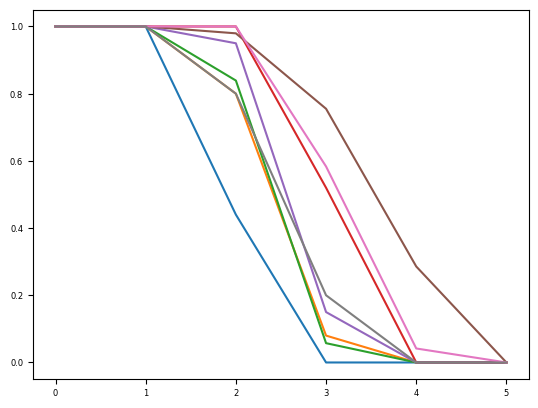

In [8]:
df_std = df_t_melt_pivot.std()
df_std
starvePerc_ste = starvePerc.copy()
starvePerc_std = starvePerc.copy()
for i in range(6):
    for j in starvePerc.columns:
        starvePerc_std.loc[i, j] = (df_std[j+'_'+str(i)])
        starvePerc_ste.loc[i, j] = (df_std[j+'_'+str(i)])/np.sqrt(starve.loc[0][j])
        
starvePerc_ste
plt.plot(starvePerc)



/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_75274/494317686.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect1=plt.Rectangle(xy=(0,1.2), width=5, height=0.1, color='powderblue',edgecolor = 'gray' )
/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_75274/494317686.py:21: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect2=plt.Rectangle(xy=(1,1.1), width=4, height=0.1, color='pink' ,edgecolor = 'gray' )
/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_75274/494317686.py:22: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect3=plt.Rectangle(xy=(0,1.1), width=0.99, height=0.1, color='whitesmoke' ,edgecolor = 'gray' )
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following fa

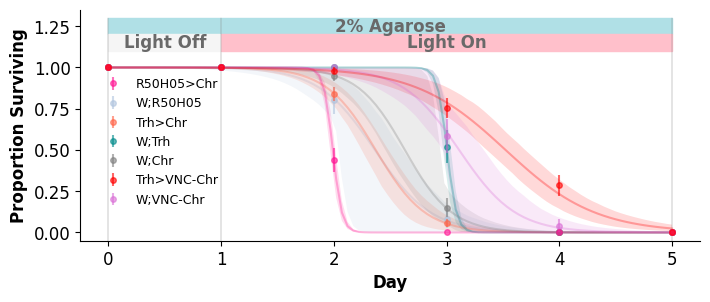

In [9]:
setFont('inter', 12)

f = plt.figure(figsize = (8, 3))
palette = {'R50H05>Chr':'deeppink', 'W;R50H05':'lightsteelblue', 'Trh>Chr':'tomato', 'W;Trh':'darkcyan', 'W;Chr':'gray', 'Trh>VNC-Chr':'red',
       'W;VNC-Chr':'orchid'}
zorder_list = {0: 10, 1:1, 2:2, 3:3, 4:4, 5:20, 6:6}
for i in range(7):
    df_t_sub = df_t.loc[df_t.genotype==starvePerc.columns[i]].drop(['genotype', 'count', 'total'], axis = 1)
    df_t_sub_melt = df_t_sub.melt(id_vars=['Day'], value_vars=df_t_sub.columns[1::])
    g = sns.regplot(x="Day", y="value", data=df_t_sub_melt, logistic=True, color = palette[starvePerc.columns[i]], 
                    scatter = False, line_kws={'alpha': 0.3, 'zorder':zorder_list[i], 'linewidth':1.5})
for i in range(7):
    plt.errorbar(starvePerc.index, starvePerc.iloc[:, i], yerr=starvePerc_ste.iloc[:, i], fmt='o',
                 markersize = 4, alpha = .6, color = palette[starvePerc.columns[i]], 
                 label = starvePerc.columns[i], zorder = zorder_list[i])
f.axes[0].plot([0, 0], [1.3, -0.05], color = 'gray', linewidth = 0.3 )
f.axes[0].plot([1, 1], [1.3, -0.05], color = 'gray', linewidth = 0.3 )
f.axes[0].plot([5, 5], [1.3, -0.05], color = 'gray', linewidth = 0.3 )

rect1=plt.Rectangle(xy=(0,1.2), width=5, height=0.1, color='powderblue',edgecolor = 'gray' )
rect2=plt.Rectangle(xy=(1,1.1), width=4, height=0.1, color='pink' ,edgecolor = 'gray' )
rect3=plt.Rectangle(xy=(0,1.1), width=0.99, height=0.1, color='whitesmoke' ,edgecolor = 'gray' )
f.axes[0].add_patch(rect1)
f.axes[0].add_patch(rect2)
f.axes[0].add_patch(rect3)
f.axes[0].set_ylim(-0.05, 1.35)
f.axes[0].spines[['right', 'top']].set_visible(False)
f.axes[0].text(0.5, 1.15, 'Light Off', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
f.axes[0].text(3, 1.15, 'Light On', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
f.axes[0].text(2.5, 1.25, '2% Agarose', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
plt.legend(fontsize = 9, loc='lower left', bbox_to_anchor=(.015, .1), frameon = False)
plt.ylabel('Proportion Surviving', weight = 'bold')
plt.xlabel('Day', weight = 'bold')
plt.savefig('starvecurve.png', dpi = 300)
plt.savefig(figurepath+'/images/starvecurve.svg', bbox_inches = 'tight')
# plt.savefig(figurepath+'/images/starvecurve.svg')


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSepara

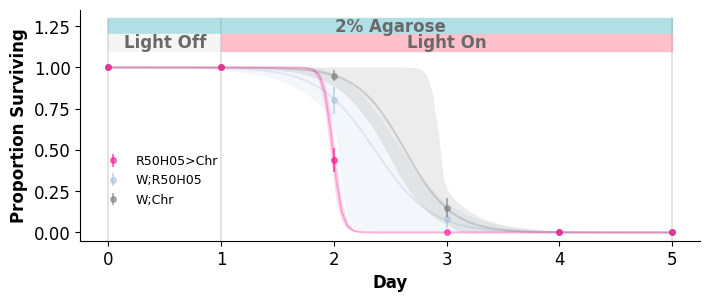

findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because

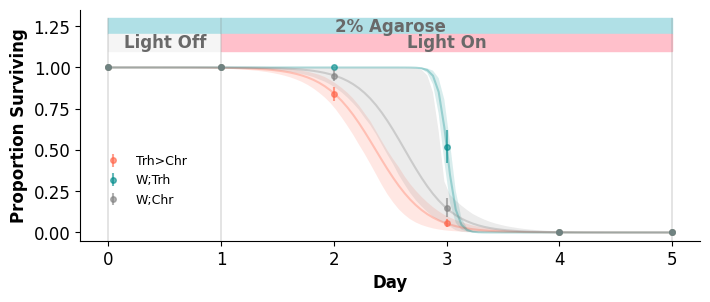

findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because none of the following families were found: inter
findfont: Generic family 'sans-serif' not found because

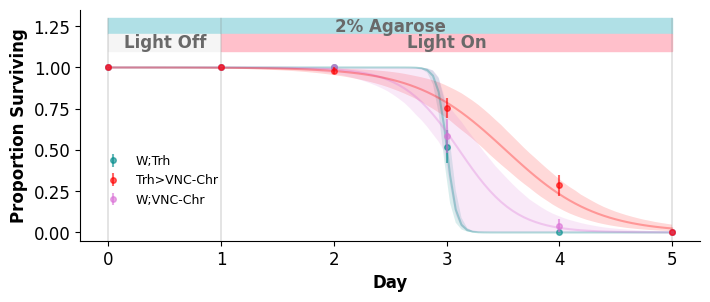

In [10]:
setFont('inter', 12)

f = plt.figure(figsize = (8, 3))
palette = {'R50H05>Chr':'deeppink', 'W;R50H05':'lightsteelblue', 'Trh>Chr':'tomato', 'W;Trh':'darkcyan', 'W;Chr':'gray', 'Trh>VNC-Chr':'red',
       'W;VNC-Chr':'orchid'}
zorder_list = {0: 10, 1:1, 2:2, 3:3, 4:4, 5:20, 6:6}
for i in [0, 1, 4]:
    df_t_sub = df_t.loc[df_t.genotype==starvePerc.columns[i]].drop(['genotype', 'count', 'total'], axis = 1)
    df_t_sub_melt = df_t_sub.melt(id_vars=['Day'], value_vars=df_t_sub.columns[1::])
    g = sns.regplot(x="Day", y="value", data=df_t_sub_melt, logistic=True, color = palette[starvePerc.columns[i]], 
                    scatter = False, line_kws={'alpha': 0.3, 'zorder':zorder_list[i], 'linewidth':1.5})
for i in [0, 1, 4]:
    plt.errorbar(starvePerc.index, starvePerc.iloc[:, i], yerr=starvePerc_ste.iloc[:, i], fmt='o',
                 markersize = 4, alpha = .6, color = palette[starvePerc.columns[i]], 
                 label = starvePerc.columns[i], zorder = zorder_list[i])
f.axes[0].plot([0, 0], [1.3, -0.05], color = 'gray', linewidth = 0.3 )
f.axes[0].plot([1, 1], [1.3, -0.05], color = 'gray', linewidth = 0.3 )
f.axes[0].plot([5, 5], [1.3, -0.05], color = 'gray', linewidth = 0.3 )

rect1=plt.Rectangle(xy=(0,1.2), width=5, height=0.1, color='powderblue',edgecolor = 'gray' )
rect2=plt.Rectangle(xy=(1,1.1), width=4, height=0.1, color='pink' ,edgecolor = 'gray' )
rect3=plt.Rectangle(xy=(0,1.1), width=0.99, height=0.1, color='whitesmoke' ,edgecolor = 'gray' )
f.axes[0].add_patch(rect1)
f.axes[0].add_patch(rect2)
f.axes[0].add_patch(rect3)
f.axes[0].set_ylim(-0.05, 1.35)
f.axes[0].spines[['right', 'top']].set_visible(False)
f.axes[0].text(0.5, 1.15, 'Light Off', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
f.axes[0].text(3, 1.15, 'Light On', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
f.axes[0].text(2.5, 1.25, '2% Agarose', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
plt.legend(fontsize = 9, loc='lower left', bbox_to_anchor=(.015, .1), frameon = False)
plt.ylabel('Proportion Surviving', weight = 'bold')
plt.xlabel('Day', weight = 'bold')
plt.savefig('starvecurve.png', dpi = 300)
plt.savefig(figurepath+'/images/starvecurve_R50.svg', bbox_inches = 'tight')
# plt.savefig(figurepath+'/images/starvecurve.svg')



f = plt.figure(figsize = (8, 3))
palette = {'R50H05>Chr':'deeppink', 'W;R50H05':'lightsteelblue', 'Trh>Chr':'tomato', 'W;Trh':'darkcyan', 'W;Chr':'gray', 'Trh>VNC-Chr':'red',
       'W;VNC-Chr':'orchid'}
zorder_list = {0: 10, 1:1, 2:2, 3:3, 4:4, 5:20, 6:6}
for i in [2, 3, 4]:
    df_t_sub = df_t.loc[df_t.genotype==starvePerc.columns[i]].drop(['genotype', 'count', 'total'], axis = 1)
    df_t_sub_melt = df_t_sub.melt(id_vars=['Day'], value_vars=df_t_sub.columns[1::])
    g = sns.regplot(x="Day", y="value", data=df_t_sub_melt, logistic=True, color = palette[starvePerc.columns[i]], 
                    scatter = False, line_kws={'alpha': 0.3, 'zorder':zorder_list[i], 'linewidth':1.5})
for i in [2, 3, 4]:
    plt.errorbar(starvePerc.index, starvePerc.iloc[:, i], yerr=starvePerc_ste.iloc[:, i], fmt='o',
                 markersize = 4, alpha = .6, color = palette[starvePerc.columns[i]], 
                 label = starvePerc.columns[i], zorder = zorder_list[i])
f.axes[0].plot([0, 0], [1.3, -0.05], color = 'gray', linewidth = 0.3 )
f.axes[0].plot([1, 1], [1.3, -0.05], color = 'gray', linewidth = 0.3 )
f.axes[0].plot([5, 5], [1.3, -0.05], color = 'gray', linewidth = 0.3 )

rect1=plt.Rectangle(xy=(0,1.2), width=5, height=0.1, color='powderblue',edgecolor = 'gray' )
rect2=plt.Rectangle(xy=(1,1.1), width=4, height=0.1, color='pink' ,edgecolor = 'gray' )
rect3=plt.Rectangle(xy=(0,1.1), width=0.99, height=0.1, color='whitesmoke' ,edgecolor = 'gray' )
f.axes[0].add_patch(rect1)
f.axes[0].add_patch(rect2)
f.axes[0].add_patch(rect3)
f.axes[0].set_ylim(-0.05, 1.35)
f.axes[0].spines[['right', 'top']].set_visible(False)
f.axes[0].text(0.5, 1.15, 'Light Off', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
f.axes[0].text(3, 1.15, 'Light On', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
f.axes[0].text(2.5, 1.25, '2% Agarose', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
plt.legend(fontsize = 9, loc='lower left', bbox_to_anchor=(.015, .1), frameon = False)
plt.ylabel('Proportion Surviving', weight = 'bold')
plt.xlabel('Day', weight = 'bold')
plt.savefig('starvecurve.png', dpi = 300)
plt.savefig(figurepath+'/images/starvecurve_Trh.svg', bbox_inches = 'tight')

f = plt.figure(figsize = (8, 3))
palette = {'R50H05>Chr':'deeppink', 'W;R50H05':'lightsteelblue', 'Trh>Chr':'tomato', 'W;Trh':'darkcyan', 'W;Chr':'gray', 'Trh>VNC-Chr':'red',
       'W;VNC-Chr':'orchid'}
zorder_list = {0: 10, 1:1, 2:2, 3:3, 4:4, 5:20, 6:6}
for i in [3, 5, 6]:
    df_t_sub = df_t.loc[df_t.genotype==starvePerc.columns[i]].drop(['genotype', 'count', 'total'], axis = 1)
    df_t_sub_melt = df_t_sub.melt(id_vars=['Day'], value_vars=df_t_sub.columns[1::])
    g = sns.regplot(x="Day", y="value", data=df_t_sub_melt, logistic=True, color = palette[starvePerc.columns[i]], 
                    scatter = False, line_kws={'alpha': 0.3, 'zorder':zorder_list[i], 'linewidth':1.5})
for i in [3, 5, 6]:
    plt.errorbar(starvePerc.index, starvePerc.iloc[:, i], yerr=starvePerc_ste.iloc[:, i], fmt='o',
                 markersize = 4, alpha = .6, color = palette[starvePerc.columns[i]], 
                 label = starvePerc.columns[i], zorder = zorder_list[i])
f.axes[0].plot([0, 0], [1.3, -0.05], color = 'gray', linewidth = 0.3 )
f.axes[0].plot([1, 1], [1.3, -0.05], color = 'gray', linewidth = 0.3 )
f.axes[0].plot([5, 5], [1.3, -0.05], color = 'gray', linewidth = 0.3 )

rect1=plt.Rectangle(xy=(0,1.2), width=5, height=0.1, color='powderblue',edgecolor = 'gray' )
rect2=plt.Rectangle(xy=(1,1.1), width=4, height=0.1, color='pink' ,edgecolor = 'gray' )
rect3=plt.Rectangle(xy=(0,1.1), width=0.99, height=0.1, color='whitesmoke' ,edgecolor = 'gray' )
f.axes[0].add_patch(rect1)
f.axes[0].add_patch(rect2)
f.axes[0].add_patch(rect3)
f.axes[0].set_ylim(-0.05, 1.35)
f.axes[0].spines[['right', 'top']].set_visible(False)
f.axes[0].text(0.5, 1.15, 'Light Off', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
f.axes[0].text(3, 1.15, 'Light On', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
f.axes[0].text(2.5, 1.25, '2% Agarose', ha = 'center', va = 'center', color = 'dimgray', weight = 'bold')
plt.legend(fontsize = 9, loc='lower left', bbox_to_anchor=(.015, .1), frameon = False)
plt.ylabel('Proportion Surviving', weight = 'bold')
plt.xlabel('Day', weight = 'bold')
plt.savefig('starvecurve.png', dpi = 300)
plt.savefig(figurepath+'/images/starvecurve_TrhV.svg', bbox_inches = 'tight')




/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_75274/227897146.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brain['Normalized 5HT intensity'] = brain['Normalized 5HT intensity']/basemean
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 10.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_75274/227897146.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

0.7306148769399999


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 9.1% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


192
196


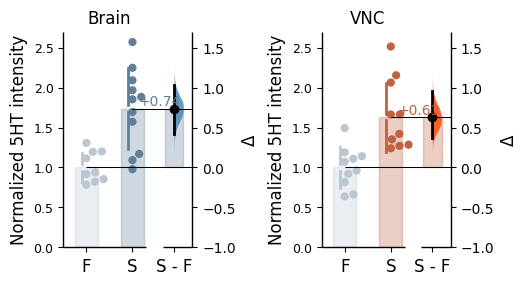

In [122]:
import dabest
import pandas
setFont('inter', 9)
f, axes = plt.subplots(nrows=1, ncols=2,
                      figsize=(5, 2.8),
                      gridspec_kw={'wspace': 1, 'hspace': .5} # ensure proper width-wise spacing.
                     )
fedstarved = pd.read_csv('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Starvation Resistance/Fed_Starved.csv',delimiter=',')
fedstarved.columns
setFont('inter', 10)
fedstarved
brain = fedstarved.loc[fedstarved['Region']== 'Brain']
basemean = brain.loc[brain['Starvation'] == 'Fed']['Normalized 5HT intensity'].mean()
brain['Normalized 5HT intensity'] = brain['Normalized 5HT intensity']/basemean
brain_contrast = dabest.load(brain, x = 'Starvation', y = 'Normalized 5HT intensity', idx = ('Fed', 'Starved'))
fbrain = brain_contrast.mean_diff.plot(fig_size = (4,3), swarm_ylim = [0, 2.7], ax = axes[0], 
                                  custom_palette = {'Fed':'lightsteelblue', 'Starved':'steelblue'},
                                  es_marker_size = 6);


vnc = fedstarved.loc[fedstarved['Region']== 'VNC']
basemean = vnc.loc[vnc['Starvation'] == 'Fed']['Normalized 5HT intensity'].mean()
print(basemean)
vnc['Normalized 5HT intensity'] = vnc['Normalized 5HT intensity']/basemean
vnc_contrast = dabest.load(vnc, x = 'Starvation', y = 'Normalized 5HT intensity', idx = ('Fed', 'Starved'))
fvnc = vnc_contrast.mean_diff.plot(fig_size = (4,3), swarm_ylim = [0, 2.7], ax = axes[1], 
                                  custom_palette = {'Fed':'lightsteelblue', 'Starved':'orangered'},
                                  es_marker_size = 6);
# vnc_5ht_contrast = dabest.load(vnc, x = 'Starvation', y = '5HT Intensity', idx = ('Fed', 'Starved'))
titles = ['Brain','VNC']
f.axes[0].set_xticklabels(['F', 'S']) 
f.axes[0].contrast_axes.set_xticklabels(['', 'S - F']) 
f.axes[1].set_xticklabels(['F', 'S']) 
f.axes[1].contrast_axes.set_xticklabels(['', 'S - F']) 
f.axes[0].contrast_axes.set_ylabel('$\Delta$') 
f.axes[1].contrast_axes.set_ylabel('$\Delta$') 




for i in range(len(axes.flatten())):
    axes.flatten()[i].set_title(titles[i], ha = 'center')
f.savefig(figurepath+'/images/5htnorm.png', dpi = 300)
f.savefig(figurepath+'/images/5htnorm.svg')

brain_contrast_table = make_delta_results(brain_contrast, 'Fed W1118', 'Starved W1118')
write_results_table(SPREADSHEET_ID, 'Figure 6A Brain Normalized 5HT', brain_contrast_table, sheet = 'Figure 6', starting_row = None)

vnc_contrast_table = make_delta_results(vnc_contrast, 'Fed W1118', 'Starved W1118')
write_results_table(SPREADSHEET_ID, 'Figure 6B VNC Normalized 5HT', vnc_contrast_table, sheet = 'Figure 6', starting_row = None)


In [12]:
rnaidf['StatusExpt'].unique()

NameError: name 'rnaidf' is not defined

# RNAi Data

In [13]:
metapath = paperpath + 'DataforFigures/Behavior/Data/Figure6exptMeta.csv'
fullMetaData = pd.read_csv(metapath)
dataDict=dict()
stateDict = {'24':'Starved','48':'Starved', '0':'Fed'}

for i in range(len(fullMetaData)):
    data = pd.read_csv(picklepath + fullMetaData.iloc[i, 1]).sort_values(by = 'Status')
    data['Starvation'] = data['Starvation'].round().astype('str')
    dataDict[fullMetaData.iloc[i, 0] ]= data
    fullMetaData.iloc[i, -3] = data['Starvation'][0]
    fullMetaData.iloc[i, -2] = stateDict[data['Starvation'][0]]
    fullMetaData.iloc[i, -1] = len(data.loc[data['Status']=='Test'])

print(fullMetaData)


         Expt               File Group Delta Type Starved Hours State  \
0       w1118  W1118Dark_ele.csv    wt      delta             0   Fed   
1       w1118  W1118Dark_ele.csv    wt      delta             0   Fed   
2       w1118  W1118Dark_ele.csv    wt      delta             0   Fed   
3       w1118  W1118Dark_ele.csv    wt      delta             0   Fed   
4       w1118  W1118Dark_ele.csv    wt      delta             0   Fed   
5     TrhTrhi    TrhTrhi_ele.csv  RNAi      delta             0   Fed   
6    TrhGluti   TrhGluti_ele.csv  RNAi      delta             0   Fed   
7    TrhSut2i   TrhSut2i_ele.csv  RNAi      delta             0   Fed   
8    TrhVTrhi   TrhVTrhi_ele.csv  RNAi      delta             0   Fed   
9   TrhVGluti  TrhVGluti_ele.csv  RNAi      delta             0   Fed   
10  TrhVSut2i  TrhVSut2i_ele.csv  RNAi      delta             0   Fed   

    Test Sample Size  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4       

['Ctrl_TrhTrhi_Combined Controls' 'Test_TrhTrhi_Trh-Gal4>Trhi'
 'Ctrl_TrhGluti_Combined Controls' 'Test_TrhGluti_Trh-Gal4>Glut1i'
 'Ctrl_TrhSut2i_Combined Controls' 'Test_TrhSut2i_Trh-Gal4>sut2i'
 'Ctrl_TrhVTrhi_Combined Controls' 'Test_TrhVTrhi_Trh-AND-tsh-Gal4>Trhi'
 'Ctrl_TrhVGluti_Combined Controls'
 'Test_TrhVGluti_Trh-AND-tsh-Gal4>Glut1i'
 'Ctrl_TrhVSut2i_Combined Controls'
 'Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i']
0             Ctrl_TrhTrhi_Combined Controls
63            Ctrl_TrhTrhi_Combined Controls
62            Ctrl_TrhTrhi_Combined Controls
61            Ctrl_TrhTrhi_Combined Controls
60            Ctrl_TrhTrhi_Combined Controls
                       ...                  
37     Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i
36     Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i
35     Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i
49     Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i
135    Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i
Name: StatusExpt, Length: 519, dtype: object
187


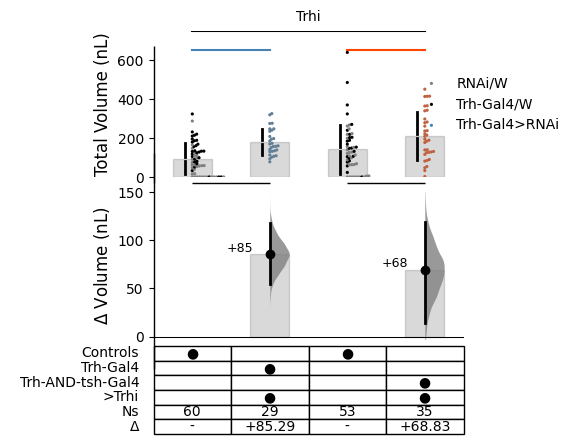

In [111]:
# fig6b, axes = plt.subplots(2, 3, figsize = [12, 6])
%run 001_ContrastPlotkwargs.ipynb
setFont('inter', 10)
rnaidata = []
for i in fullMetaData.index:
    if fullMetaData.loc[i, 'Expt'] !='w1118':
        data = dataDict[fullMetaData.iloc[i, 0]]
        data['Expt'] = fullMetaData.loc[i, 'Expt']
        rnaidata.append(data)
rnaidf = pd.concat(rnaidata)

rnaidf = rnaidf.drop(rnaidf.loc[rnaidf['Genotype']=='empty'].index)
rnaidf['Volume'] = rnaidf['Volume'] *1000
rnaidf['GenoReduced'] =rnaidf['Genotype'].replace({'w1118; uas-trhi':'Trhi/W', 'w1118; trh-gal4':'Trh-Gal4/W', 
                                                   'trh-gal4>uas-trhi':'Trh-Gal4>Trhi',
       'w1118; uas-gluti40904':'Glut1i/W', 'trh-gal4>uas-gluti40904':'Trh-Gal4>Glut1i',
       'w1118; uas-sut2rnai':'sut2i/W', 'trh-gal4>uas-sut2rnai':'Trh-Gal4>sut2i',
       'w1118; trhvnc-gal4':'Trh-AND-tsh-Gal4/W', 'trh-vnc-gal4>uas-trhrnai':'Trh-AND-tsh-Gal4>Trhi',
       'trhvnc-gal4<uas-gluti40904':'Trh-AND-tsh-Gal4>Glut1i', 'trh-vnc-gal4>uas-sut2rnai':'Trh-AND-tsh-Gal4>sut2i'})

rnaidf['GenoReduced1'] =rnaidf['Genotype'].replace({'w1118; uas-trhi':'RNAi/W', 'w1118; trh-gal4':'Trh-Gal4/W', 
                                                   'trh-gal4>uas-trhi':'Trh-Gal4>RNAi',
       'w1118; uas-gluti40904':'RNAi/W', 'trh-gal4>uas-gluti40904':'Trh-Gal4>RNAi',
       'w1118; uas-sut2rnai':'RNAi/W', 'trh-gal4>uas-sut2rnai':'Trh-Gal4>RNAi',
       'w1118; trhvnc-gal4':'Trh-AND-tsh-Gal4/W', 'trh-vnc-gal4>uas-trhrnai':'Trh-AND-tsh-Gal4>RNAi',
       'trhvnc-gal4<uas-gluti40904':'Trh-AND-tsh-Gal4>RNAi', 'trh-vnc-gal4>uas-sut2rnai':'Trh-AND-tsh-Gal4>RNAi'})

rnaidf.loc[rnaidf['Status'] == 'Ctrl', 'GenoReduced'] = 'Combined Controls'
rnaidf['GenoReduced']
rnaidf['StatusExpt'] = rnaidf['Status'] + '_' + rnaidf['Expt'] + '_'+rnaidf['GenoReduced']
print(rnaidf['StatusExpt'].unique())
idx  = (('Ctrl_TrhTrhi_Combined Controls', 'Test_TrhTrhi_Trh-Gal4>Trhi'), ('Ctrl_TrhVTrhi_Combined Controls', 'Test_TrhVTrhi_Trh-AND-tsh-Gal4>Trhi'), 
        )
rnaipalette = {'Ctrl_TrhTrhi_Combined Controls':'gray', 'Test_TrhTrhi_Trh-Gal4>Trhi':'steelblue', 'Ctrl_TrhVTrhi_Combined Controls':'gray', 'Test_TrhVTrhi_TrhVNC-Gal4>Trhi':'orangered',
               'Ctrl_TrhGluti_Combined Controls':'gray', 'Test_TrhGluti_Trh-Gal4>Glut1i':'steelblue', 'Ctrl_TrhVGluti_Combined Controls':'gray', 'Test_TrhVGluti_TrhVNC-Gal4>Glut1i':'orangered', 
       'Ctrl_TrhSut2i_Combined Controls':'gray', 'Test_TrhSut2i_Trh-Gal4>sut2i':'steelblue', 'Ctrl_TrhVSut2i_Combined Controls':'gray', 'Test_TrhVSut2i_TrhVNC-Gal4>sut2i':'orangered'}
rnaigenopalette = {'w1118; uas-trhi':'gray', 'w1118; trh-gal4':'k', 'trh-gal4>uas-trhi':'steelblue',
       'w1118; uas-gluti40904':'gray', 'trh-gal4>uas-gluti40904':'steelblue',
       'w1118; uas-sut2rnai':'gray', 'trh-gal4>uas-sut2rnai':'steelblue',
       'w1118; trhvnc-gal4':'k', 'trh-vnc-gal4>uas-trhrnai':'orangered',
       'trhvnc-gal4<uas-gluti40904':'orangered', 'trh-vnc-gal4>uas-sut2rnai':'orangered'}
rnaigenoreducedpalette = {'RNAi/W':'gray', 'Trh-Gal4/W':'k', 'Trh-Gal4>RNAi':'steelblue',
       'RNAi/W':'gray', 'Trh-Gal4>RNAi':'steelblue',
       'RNAi/W':'gray', 'Trh-Gal4>RNAi':'steelblue',
       'Trh-AND-tsh-Gal4/W':'k', 'Trh-AND-tsh-Gal4>RNAi':'orangered',
       'Trh-AND-tsh-Gal4>RNAi':'orangered', 'Trh-AND-tsh-Gal4>RNAi':'orangered'}
print(rnaidf.StatusExpt)

rnaiC= dabest.load(rnaidf, x = 'StatusExpt', y = 'Volume', idx = idx)
frnaiC = rnaiC.mean_diff.plot(
    color_col = 'GenoReduced1', 
                              fig_size=(4, 4), 
                              custom_palette= rnaigenoreducedpalette, 
                              delta_text_kwargs =dt_kwargs, 
                              contrast_bars_kwargs= cb_kwargs,
                              swarm_bars_kwargs= sb_kwargs,
                              raw_marker_size=rm_size,  
                              es_marker_size= es_size,
                             gridkey_rows=['Controls', 'Trh-Gal4', 'Trh-AND-tsh-Gal4', '>Trhi',] 
                             )
frnaiC.axes[0].set_xticklabels(['Ctrl', 'Test', 'Ctrl', 'Test'])
frnaiC.axes[1].set_xticklabels(['', 'Test - Ctrl', '', 'Test - Ctrl'])
frnaiC.axes[0].plot([0, 1], [650, 650], color = 'steelblue')
frnaiC.axes[0].plot([2, 3], [650, 650], color = 'orangered')
frnaiC.axes[0].plot([0, 3], [750, 750], color = 'k')
# frnaiC.axes[0].text(.5, 660, 'Brain', ha =  'center', color = 'steelblue')
# frnaiC.axes[0].text(2.5, 660, 'VNC', ha =  'center', color = 'orangered')
frnaiC.axes[0].text(1.5, 800, 'Trhi', ha =  'center', color = 'k')
frnaiC.axes[0].set_ylabel('Total Volume (nL)')
frnaiC.axes[1].set_ylabel('$\Delta$ Volume (nL)')
frnaiC.axes[1].set_ylim(-2, 150)
frnaiC.axes[0].set_ylim(-2, 750)
order = [2, 1, 0]
handles = rnaidf.GenoReduced1.unique()
handles = handles[[0, 1, 2]]

frnaiC.axes[0].legend([handles[2-i] for i in order], frameon=False,loc='right', bbox_to_anchor=[1.35, 0.5], fontsize= 10, markerscale = 1, edgecolor = "white")
leg = frnaiC.axes[0].get_legend()
hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
hl_dict['_child0'].set_color(rnaigenopalette['w1118; uas-trhi'])
hl_dict['_child1'].set_color(rnaigenopalette['w1118; trh-gal4'])
hl_dict['_child2'].set_color(rnaigenopalette['trh-gal4>uas-trhi'])
# hl_dict['_child3'].set_color(rnaigenopalette['w1118; trh-gal4'])
# hl_dict['_child4'].set_color(rnaigenopalette['trh-gal4>uas-trhi'])
rnaidf.to_csv(figurepath+'/rnaidf.csv')
for i in range(13, 15):
    frnaiC.axes[1].get_children()[i].set_text(frnaiC.axes[1].get_children()[i].get_text()[0:-3])
for i in range(7, 9):
    frnaiC.axes[1].get_children()[i].set_visible(False)
frnaiC.tight_layout(w_pad=12)
frnaiC.savefig(figurepath+'/images/Trhi.svg', bbox_inches='tight')
frnaiC.savefig(figurepath+'/images/Trhi.png', dpi = 300, bbox_inches='tight')

effectTable = rnaiC.mean_diff.results[['control','test','control_N','test_N','effect_size','difference','bca_low','bca_high', 'pvalue_mann_whitney']]

write_results_table(SPREADSHEET_ID, 'Figure 6E Trhi', effectTable, sheet = 'Figure 6', starting_row = None)


In [72]:
print(rnaidf['StatusExpt'].unique())
print(idx)


['Ctrl_TrhTrhi_Combined Controls' 'Test_TrhTrhi_Trh-Gal4>Trhi'
 'Ctrl_TrhGluti_Combined Controls' 'Test_TrhGluti_Trh-Gal4>GLuti'
 'Ctrl_TrhSut2i_Combined Controls' 'Test_TrhSut2i_Trh-Gal4>sut2i'
 'Ctrl_TrhVTrhi_Combined Controls' 'Test_TrhVTrhi_Trh-AND-tsh-Gal4>Trhi'
 'Ctrl_TrhVGluti_Combined Controls'
 'Test_TrhVGluti_Trh-AND-tsh-Gal4>Gluti'
 'Ctrl_TrhVSut2i_Combined Controls'
 'Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i']
(('Ctrl_TrhTrhi_Combined Controls', 'Test_TrhTrhi_Trh-Gal4>Trhi'), ('Ctrl_TrhVTrhi_Combined Controls', 'Test_TrhVTrhi_Trh-AND-tsh-Gal4>Trhi'))


0             Ctrl_TrhTrhi_Combined Controls
63            Ctrl_TrhTrhi_Combined Controls
62            Ctrl_TrhTrhi_Combined Controls
61            Ctrl_TrhTrhi_Combined Controls
60            Ctrl_TrhTrhi_Combined Controls
                       ...                  
37     Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i
36     Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i
35     Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i
49     Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i
135    Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i
Name: StatusExpt, Length: 519, dtype: object


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 26.8% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


180


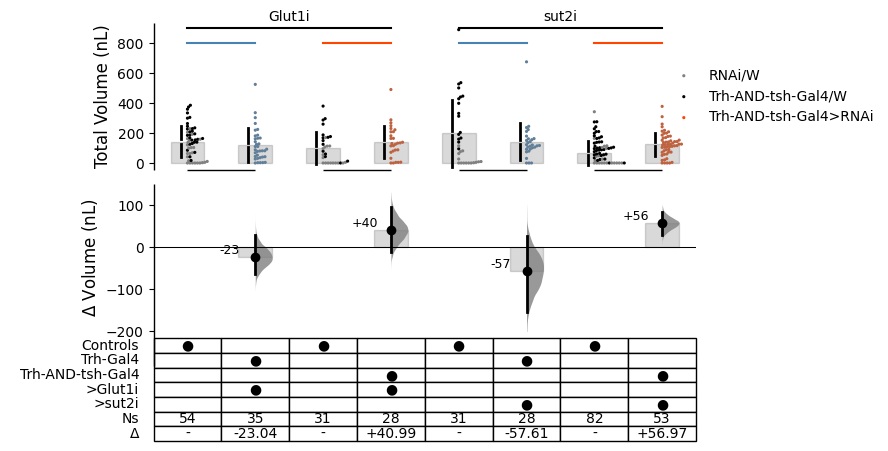

In [107]:
# fig6b, axes = plt.subplots(2, 3, figsize = [12, 6])
%run 001_ContrastPlotkwargs.ipynb
setFont('inter', 10)
# rnaidata = []
# for i in fullMetaData.index:
#     if fullMetaData.loc[i, 'Expt'] !='w1118':
#         data = dataDict[fullMetaData.iloc[i, 0]]
#         data['Expt'] = fullMetaData.loc[i, 'Expt']
#         rnaidata.append(data)
# rnaidf = pd.concat(rnaidata)

# rnaidf = rnaidf.drop(rnaidf.loc[rnaidf['Genotype']=='empty'].index)
# rnaidf['Volume'] = rnaidf['Volume'] *1000
# rnaidf['GenoReduced'] =rnaidf['Genotype'].replace({'w1118; uas-trhi':'UAS/W', 'w1118; trh-gal4':'Trh-Gal4/W', 
#                                                    'trh-gal4>uas-trhi':'Trh-Gal4>Trhi',
#        'w1118; uas-gluti40904':'UAS/W', 'trh-gal4>uas-gluti40904':'Trh-Gal4>GLuti',
#        'w1118; uas-sut2rnai':'UAS/W', 'trh-gal4>uas-sut2rnai':'Trh-Gal4>Sut2i',
#        'w1118; trhvnc-gal4':'TrhVNC-Gal4/W', 'trh-vnc-gal4>uas-trhrnai':'TrhVNC-Gal4>Trhi',
#        'trhvnc-gal4<uas-gluti40904':'TrhVNC-Gal4>Gluti', 'trh-vnc-gal4>uas-sut2rnai':'TrhVNC-Gal4>Sut2i'})
# rnaidf.loc[rnaidf['Status'] == 'Ctrl', 'GenoReduced'] = 'Combined Controls'
# rnaidf['GenoReduced']
# rnaidf['StatusExpt'] = rnaidf['Status'] + '_' + rnaidf['Expt'] + '_'+rnaidf['GenoReduced']
# print(rnaidf['StatusExpt'].unique())
idx  = ( 
        ('Ctrl_TrhGluti_Combined Controls', 'Test_TrhGluti_Trh-Gal4>Glut1i'),('Ctrl_TrhVGluti_Combined Controls', 'Test_TrhVGluti_Trh-AND-tsh-Gal4>Glut1i'),
       ('Ctrl_TrhSut2i_Combined Controls', 'Test_TrhSut2i_Trh-Gal4>sut2i'),  ('Ctrl_TrhVSut2i_Combined Controls','Test_TrhVSut2i_Trh-AND-tsh-Gal4>sut2i'))
rnaipalette = {'Ctrl_TrhTrhi_Combined Controls':'gray', 'Test_TrhTrhi_Trh-Gal4>Trhi':'steelblue', 'Ctrl_TrhVTrhi_Combined Controls':'gray', 'Test_TrhVTrhi_TrhVNC-Gal4>Trhi':'orangered',
               'Ctrl_TrhGluti_Combined Controls':'gray', 'Test_TrhGluti_Trh-Gal4>GLuti':'steelblue', 'Ctrl_TrhVGluti_Combined Controls':'gray', 'Test_TrhVGluti_TrhVNC-Gal4>Gluti':'orangered', 
       'Ctrl_TrhSut2i_Combined Controls':'gray', 'Test_TrhSut2i_Trh-Gal4>sut2i':'steelblue', 'Ctrl_TrhVSut2i_Combined Controls':'gray', 'Test_TrhVSut2i_TrhVNC-Gal4>sut2i':'orangered'}
rnaigenopalette = {'w1118; uas-trhi':'gray', 'w1118; trh-gal4':'k', 'trh-gal4>uas-trhi':'steelblue',
       'w1118; uas-gluti40904':'gray', 'trh-gal4>uas-gluti40904':'steelblue',
       'w1118; uas-sut2rnai':'gray', 'trh-gal4>uas-sut2rnai':'steelblue',
       'w1118; trhvnc-gal4':'k', 'trh-vnc-gal4>uas-trhrnai':'orangered',
       'trhvnc-gal4<uas-gluti40904':'orangered', 'trh-vnc-gal4>uas-sut2rnai':'orangered'}
rnaigenoreducedpalette = {'RNAi/W':'gray', 'Trh-Gal4/W':'k', 'Trh-Gal4>RNAi':'steelblue',
       'RNAi/W':'gray', 'Trh-Gal4>RNAi':'steelblue',
       'RNAi/W':'gray', 'Trh-Gal4>RNAi':'steelblue',
       'Trh-AND-tsh-Gal4/W':'k', 'Trh-AND-tsh-Gal4>RNAi':'orangered',
       'Trh-AND-tsh-Gal4>RNAi':'orangered', 'Trh-AND-tsh-Gal4>RNAi':'orangered'}
print(rnaidf.StatusExpt)

rnaiC= dabest.load(rnaidf, x = 'StatusExpt', y = 'Volume', idx = idx)
frnaiC = rnaiC.mean_diff.plot(color_col = 'GenoReduced1', 
                              fig_size=(7, 4), 
                              custom_palette= rnaigenoreducedpalette, 
                              delta_text_kwargs =dt_kwargs, 
                              contrast_bars_kwargs= cb_kwargs,
                              swarm_bars_kwargs= sb_kwargs,
                              raw_marker_size=rm_size,  
                              es_marker_size= es_size,
                             gridkey_rows=['Controls', 'Trh-Gal4', 'tsh',  '>Glut1i', '>sut2i',] )
frnaiC.axes[0].set_xticklabels([ 'Ctrl', 'Test', 'Ctrl', 'Test', 'Ctrl', 'Test', 'Ctrl', 'Test'])
frnaiC.axes[1].set_xticklabels([ '', 'Test - Ctrl','', 'Test - Ctrl', '', 'Test - Ctrl','', 'Test - Ctrl',])
frnaiC.axes[0].plot([0, 1], [800, 800], color = 'steelblue')
frnaiC.axes[0].plot([2, 3], [800, 800], color = 'orangered')
frnaiC.axes[0].plot([4, 5], [800, 800], color = 'steelblue')
frnaiC.axes[0].plot([6, 7], [800, 800], color = 'orangered')
frnaiC.axes[0].plot([0, 3], [900, 900], color = 'k')
frnaiC.axes[0].plot([4, 7], [900, 900], color = 'k')
# frnaiC.axes[0].text(.5, 700, 'Brain', ha =  'center', color = 'steelblue')
# frnaiC.axes[0].text(2.5, 700, 'VNC', ha =  'center', color = 'orangered')
# frnaiC.axes[0].text(4.5, 700, 'Trh', ha =  'center', color = 'steelblue')
# frnaiC.axes[0].text(6.5, 700, 'VNC', ha =  'center', color = 'orangered')
frnaiC.axes[0].text(1.5, 950, 'Glut1i', ha =  'center', color = 'k')
frnaiC.axes[0].text(5.5, 950, 'sut2i', ha =  'center', color = 'k')
frnaiC.axes[0].set_ylabel('Total Volume (nL)')
frnaiC.axes[1].set_ylabel('$\Delta$ Volume (nL)')
frnaiC.axes[1].set_ylim(-200, 150)
order = [2, 1, 0]
handles = rnaidf.GenoReduced1.unique()
handles = handles[[0, 3, 4]]

frnaiC.axes[0].legend([handles[2-i] for i in order], frameon=False,loc='right', bbox_to_anchor=[1.35, 0.5], fontsize= 10, markerscale = 1, edgecolor = "white")
leg = frnaiC.axes[0].get_legend()
hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
hl_dict['_child0'].set_color(rnaigenopalette['w1118; uas-trhi'])
hl_dict['_child1'].set_color(rnaigenopalette['w1118; trh-gal4'])
hl_dict['_child2'].set_color(rnaigenopalette['trh-vnc-gal4>uas-trhrnai'])
# hl_dict['_child3'].set_color(rnaigenopalette['w1118; trh-gal4'])
# hl_dict['_child4'].set_color(rnaigenopalette['trh-gal4>uas-trhi'])
rnaidf.to_csv(figurepath+'/rnaidf.csv')
for i in range(23, 27):
    frnaiC.axes[1].get_children()[i].set_text(frnaiC.axes[1].get_children()[i].get_text()[0:-3])
for i in range(13, 17):
    frnaiC.axes[1].get_children()[i].set_visible(False)
frnaiC.tight_layout(w_pad=12)
frnaiC.savefig(figurepath+'/images/GlutSutRNAi.svg', bbox_inches='tight')
frnaiC.savefig(figurepath+'/images/GlutSutRNAi.png', dpi = 300, bbox_inches='tight')


effectTable = rnaiC.mean_diff.results[['control','test','control_N','test_N','effect_size','difference','bca_low','bca_high', 'pvalue_mann_whitney']]

write_results_table(SPREADSHEET_ID, 'Figure 6F Gluti Sut2i', effectTable, sheet = 'Figure 6', starting_row = None)


In [ ]:
I, Scatter plot between AKH>Chr and 48 hour reversed (blue) , as well as that between Trhn>Chr and 48 hour reversed (orange). 

##### 

In [127]:
Figure("20cm", "20cm", 
    Panel(SVG(figurepath +'/images/Trhi.svg').scale(0.023),
    Text("E", 0.7, .4, size=0.4, font = 'inter', weight='bold')).move(7, .3),
    Panel(SVG(figurepath +'/images/5htnorm.svg').scale(0.020),
    Text("A", 0, .2, size=0.4, font = 'inter', weight='bold'), 
    Text("B", 4, .2, size=0.4, font = 'inter', weight='bold'),
    Text("C", 0, 5.2, size=0.4, font = 'inter', weight='bold'),
    Text("D", 4, 5.2, size=0.4, font = 'inter', weight='bold'),
         ).move(0, .5),
    Panel(SVG(figurepath +'/images/brainsimple.svg').scale(0.0015)).move(1,1.5),
    Panel(SVG(figurepath +'/images/vncsimple.svg').scale(0.0015)).move(4.8, 1.5),

    Panel(SVG(figurepath +'/images/trhsimple.svg').scale(0.0015)).move(9.9, 1.3),
    Panel(SVG(figurepath +'/images/vncsimple.svg').scale(0.0015)).move(9.9 + 2.55, 1.3),

    Panel(SVG(figurepath +'/images/GlutSutRNAi.svg').scale(0.023),
    Text("F", 0, .2, size=0.4, font = 'inter', weight='bold'),
    ).move(0, 8),
    Panel(SVG(figurepath +'/images/trhsimple.svg').scale(0.0015)).move(1 + 2.3, 7.5+1.5),
    Panel(SVG(figurepath +'/images/vncsimple.svg').scale(0.0015)).move(1 + 2.3*2, 7.5+1.5),
    Panel(SVG(figurepath +'/images/trhsimple.svg').scale(0.0015)).move(1 + 2.3*3, 7.5+1.5),
    Panel(SVG(figurepath +'/images/vncsimple.svg').scale(0.0015)).move(1 + 2.3*4, 7.5+1.5),

    Panel(SVG('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/Figures20240202/Figure7/scatter2.svg').scale(0.017),
    Text("G", 0, .2, size=0.4, font = 'inter', weight='bold'),
    ).move(13, 8),
).save(figurepath + "Figure6_alt_alt.svg")      

In [ ]:
figurepath

'/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/Figures20240202//Figure6/'

In [ ]:
frnaiC.axes[1].get_children()

[<matplotlib.collections.PolyCollection>,
 <matplotlib.lines.Line2D>,
 <matplotlib.lines.Line2D>,
 <matplotlib.collections.PolyCollection>,
 <matplotlib.lines.Line2D>,
 <matplotlib.lines.Line2D>,
 <matplotlib.collections.PolyCollection>,
 <matplotlib.lines.Line2D>,
 <matplotlib.lines.Line2D>,
 <matplotlib.collections.PolyCollection>,
 <matplotlib.lines.Line2D>,
 <matplotlib.lines.Line2D>,
 <matplotlib.lines.Line2D>,
 <matplotlib.collections.LineCollection>,
 <matplotlib.collections.LineCollection>,
 <matplotlib.collections.LineCollection>,
 <matplotlib.collections.LineCollection>,
 <matplotlib.collections.LineCollection>,
 <matplotlib.table.Table>,
 <matplotlib.patches.Rectangle>,
 <matplotlib.patches.Rectangle>,
 <matplotlib.patches.Rectangle>,
 <matplotlib.patches.Rectangle>,
 Text(0.62, -23.04413333333332, '-23.04'),
 Text(2.62, 40.992306451612905, '+40.99'),
 Text(4.62, -57.613485023041505, '-57.61'),
 Text(6.62, 56.970202715140346, '+56.97'),
 <matplotlib.spines.Spine>,
 <matplotl

In [98]:
rnaigenopalette

{'w1118; uas-trhi': 'gray',
 'w1118; trh-gal4': 'k',
 'trh-gal4>uas-trhi': 'steelblue',
 'w1118; uas-gluti40904': 'gray',
 'trh-gal4>uas-gluti40904': 'steelblue',
 'w1118; uas-sut2rnai': 'gray',
 'trh-gal4>uas-sut2rnai': 'steelblue',
 'w1118; trhvnc-gal4': 'purple',
 'trh-vnc-gal4>uas-trhrnai': 'orangered',
 'trhvnc-gal4<uas-gluti40904': 'orangered',
 'trh-vnc-gal4>uas-sut2rnai': 'orangered'}